In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42

In [2]:
Green = pd.read_csv('quantification/488.csv',index_col=0)
iRFP = pd.read_csv('quantification/640.csv',index_col=0)

df = Green
df.columns = ['488', 'Slice']
df['640'] = iRFP['Mean'].values 
df['ratio'] = df['640'].values/ df['488'].values
df = df.reindex(columns=['488','640','ratio','Slice'])

samples = ['5.KO-BV', '4.KO-DMSO','6.KO-PCB','2.WT-BV', '1.WT-DMSO','3.WT-PCB',]

for i in range(6):
    df.loc[df['Slice']==2*i+1, 'Slice'] = samples[i]
    df.loc[df['Slice']==2*i+2, 'Slice'] = samples[i]
df = df.sort_values('Slice')
df

488       640     ratio      Slice
                                             
1017  1979.312   741.975  0.374865  1.WT-DMSO
869    398.188   225.613  0.566599  1.WT-DMSO
868    696.062   393.575  0.565431  1.WT-DMSO
867    624.775   372.887  0.596834  1.WT-DMSO
866   1273.675   597.900  0.469429  1.WT-DMSO
...        ...       ...       ...        ...
500     61.050   169.613  2.778264   6.KO-PCB
501     68.213   188.637  2.765411   6.KO-PCB
502     86.763   208.863  2.407282   6.KO-PCB
492    888.825  1761.562  1.981900   6.KO-PCB
605    701.600  2169.850  3.092717   6.KO-PCB

[1210 rows x 4 columns]

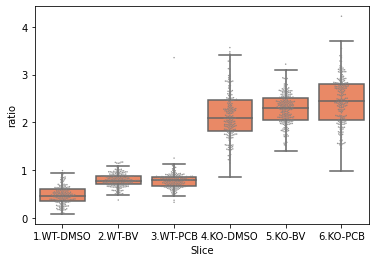

5.KO-BV
228
4.KO-DMSO
199
6.KO-PCB
207
2.WT-BV
208
1.WT-DMSO
176
3.WT-PCB
192


In [6]:
plt.figure()
sns.boxplot(data=df, x='Slice', y='ratio', color ='coral',fliersize=0)
sns.swarmplot(data=df, x='Slice', y='ratio', color ='gray', alpha=0.8, size=1.5)
plt.savefig('Hela.pdf')
plt.show()

for i in samples:
    print(i)
    print(len(df[df['Slice']==i]))